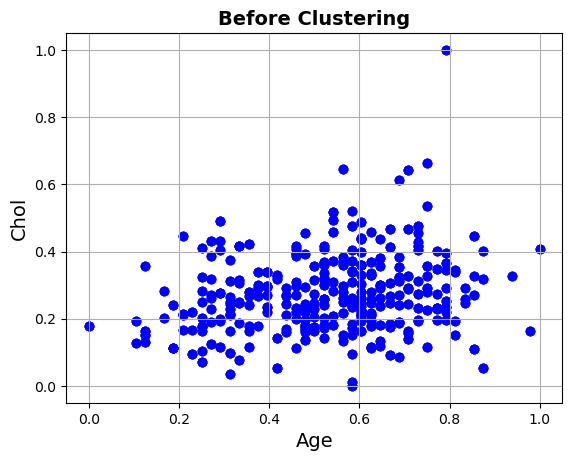

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

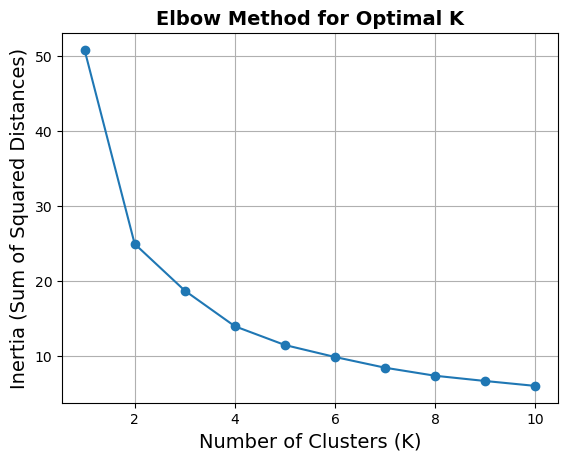

Optimal number of clusters (K): 3


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


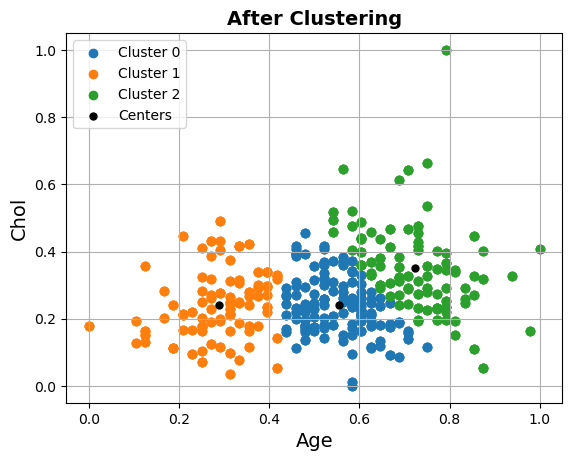

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Load and scale data
df = pd.read_excel(r"C:\Users\santhosh\Downloads\heart.xlsx", usecols=['age', 'chol'])
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# ---------- Plot 1: Before Clustering ----------
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c='blue')
plt.title("Before Clustering", fontsize=14, fontweight="bold")
plt.xlabel("Age", fontsize=14)
plt.ylabel("Chol", fontsize=14)
plt.grid(True)
plt.show()

# ---------- Elbow Method ----------
inertia_values = []
K_range = range(1, 11)
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=100)
    model.fit(df_scaled)
    inertia_values.append(model.inertia_)


# Plot Elbow Curve

plt.plot(K_range, inertia_values, marker='o')
plt.xlabel("Number of Clusters (K)", fontsize=14)
plt.ylabel("Inertia (Sum of Squared Distances)", fontsize=14)
plt.title("Elbow Method for Optimal K", fontsize=14, fontweight="bold")
plt.grid(True)
plt.show()

# Find Optimal K
knee = KneeLocator(K_range, inertia_values, curve="convex", direction="decreasing")
optimal_k = knee.elbow
print(f"Optimal number of clusters (K): {optimal_k}")

# ---------- KMeans Clustering with Optimal K ----------
final_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=100)
final_model.fit(df_scaled)
ypredict = final_model.predict(df_scaled)
centers = final_model.cluster_centers_
unique_clusters = np.unique(ypredict)

# ---------- Plot 2: After Clustering ----------
for cluster in unique_clusters:
    rowid = np.where(ypredict == cluster)
    plt.scatter(df_scaled[rowid, 0], df_scaled[rowid, 1], label=f"Cluster {cluster}")
plt.scatter(centers[:, 0], centers[:, 1], s=100, c='black', marker='.', label='Centers')
plt.title("After Clustering", fontsize=14, fontweight="bold")
plt.xlabel("Age", fontsize=14)
plt.ylabel("Chol", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [18]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
silhouette = silhouette_score(df1, ypredict)

calinski = calinski_harabasz_score(df1, ypredict)

davies = davies_bouldin_score(df1, ypredict)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.3f}")
print(f"Davies-Bouldin Index: {davies:.3f}")


Silhouette Score: 0.346
Calinski-Harabasz Index: 874.678
Davies-Bouldin Index: 1.059
